In [2]:
import pandas as pd
import numpy as np

In [3]:
historic_data = pd.read_csv("dataset_50k.csv")
historic_data

,Flight ID,Date,Airline,Ch_code,Num_code,Dep_time,Origin,Time_taken,Stops,Arr_time,Destination,Price,Class
0,30,13/02/2022,Vistara,UK,776,17:35,Boston,06:45,1,00:20,Madrid,827.13,Business
1,31,13/02/2022,Vistara,UK,808,08:00,Caracas,09:40,1,17:40,Madrid,828.45,Business
2,64,13/02/2022,Air India,AI,544,17:15,Copenhagen,03:40,1,20:55,Madrid,66.66,Economy
3,72,13/02/2022,Vistara,UK,870,20:35,Barcelona,09:00,1,05:35,Boston,838.50,Business
4,228,13/02/2022,Vistara,UK,802,18:50,Madrid,03:40,1,22:30,Copenhagen,39.52,Economy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,4969,31/03/2022,Vistara,UK,933,15:30,Boston,06:45,1,22:15,Madrid,691.87,Business
4995,4973,31/03/2022,Vistara,UK,802,18:50,Copenhagen,08:00,1,02:50,Boston,981.36,Business
4996,4976,31/03/2022,Vistara,UK,828,07:00,Copenhagen,03:40,1,10:40,Madrid,92.43,Economy
4997,4991,31/03/2022,Vistara,UK,953,20:40,Boston,09:00,1,05:40,Barcelona,515.47,Business


In [4]:
N = 100

new_data = historic_data.tail(N)
new_data

# Drop last N columns of the dataframe:
historic_data.drop(historic_data.tail(N).index,
        inplace = True)
historic_data

,Flight ID,Date,Airline,Ch_code,Num_code,Dep_time,Origin,Time_taken,Stops,Arr_time,Destination,Price,Class
0,30,13/02/2022,Vistara,UK,776,17:35,Boston,06:45,1,00:20,Madrid,827.13,Business
1,31,13/02/2022,Vistara,UK,808,08:00,Caracas,09:40,1,17:40,Madrid,828.45,Business
2,64,13/02/2022,Air India,AI,544,17:15,Copenhagen,03:40,1,20:55,Madrid,66.66,Economy
3,72,13/02/2022,Vistara,UK,870,20:35,Barcelona,09:00,1,05:35,Boston,838.50,Business
4,228,13/02/2022,Vistara,UK,802,18:50,Madrid,03:40,1,22:30,Copenhagen,39.52,Economy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4894,1649,31/03/2022,Air India,AI,804,06:10,Madrid,01:30,1,07:40,Barcelona,17.35,Economy
4895,1756,31/03/2022,Vistara,UK,851,07:00,Caracas,14:00,1,21:00,Copenhagen,434.36,Economy
4896,1764,31/03/2022,AirAsia,I5,744,09:25,Barcelona,10:55,1,20:20,Caracas,405.06,Economy
4897,1800,31/03/2022,Vistara,UK,954,06:00,Madrid,06:45,1,12:45,Boston,929.05,Business


In [5]:
new_data

,Flight ID,Date,Airline,Ch_code,Num_code,Dep_time,Origin,Time_taken,Stops,Arr_time,Destination,Price,Class
4899,1827,31/03/2022,Vistara,UK,708,20:20,Barcelona,03:00,1,23:20,Copenhagen,143.70,Business
4900,1835,31/03/2022,AirAsia,I5,2461,16:15,Copenhagen,03:40,0,19:55,Madrid,117.24,Economy
4901,1904,31/03/2022,Vistara,UK,975,06:00,Caracas,10:55,1,16:55,Barcelona,981.08,Business
4902,1909,31/03/2022,Indigo,6E,5042,10:15,Madrid,01:30,1,11:45,Barcelona,31.36,Economy
4903,1917,31/03/2022,Vistara,UK,838,21:05,Boston,08:00,1,05:05,Copenhagen,212.77,Economy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,4969,31/03/2022,Vistara,UK,933,15:30,Boston,06:45,1,22:15,Madrid,691.87,Business
4995,4973,31/03/2022,Vistara,UK,802,18:50,Copenhagen,08:00,1,02:50,Boston,981.36,Business
4996,4976,31/03/2022,Vistara,UK,828,07:00,Copenhagen,03:40,1,10:40,Madrid,92.43,Economy
4997,4991,31/03/2022,Vistara,UK,953,20:40,Boston,09:00,1,05:40,Barcelona,515.47,Business


In [6]:
outliers_data = pd.DataFrame()

mean_list = []
up_SD_list = []
down_SD_list = []
dates = []
for index, row in historic_data.iterrows():
    # DATA REGISTER:
    historic_data = pd.concat([historic_data, row.to_frame().T], ignore_index=True)

    # OUTLIERS DATA:
    mean = np.mean(pd.to_numeric(historic_data['Price']))
    SD = np.std(pd.to_numeric(historic_data['Price']))
    
    up_SD = mean + SD
    down_SD = mean - SD
    mean_list.append(mean)
    up_SD_list.append(up_SD)
    down_SD_list.append(down_SD)
    dates.append(row["Date"])

    outlier = False
    if ((down_SD) > float(row['Price'])):
        outlier = True
    
    if outlier:
        outliers_data = pd.concat([outliers_data, row.to_frame().T], ignore_index=True)

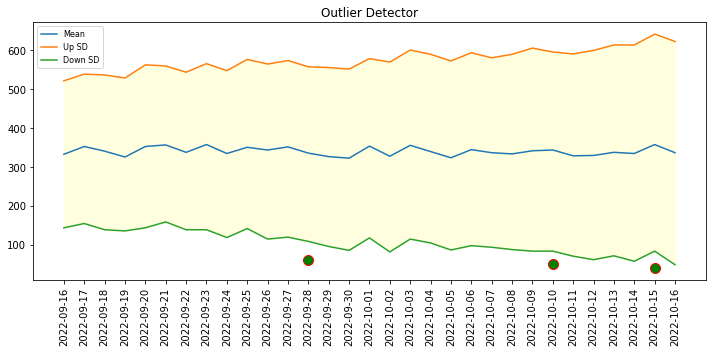

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.figure(figsize=(10, 5)), plt.gca()

# Now we will display the last recorded values defined by the number of "SHOW_DAYS" indicated through the config.json file:
dates = []
new_mean = []
new_up_SD = []
new_down_SD = []

plt.plot(dates, new_mean, label = "Mean")
plt.plot(dates, new_up_SD, label = "Up SD")
plt.plot(dates, new_down_SD, label = "Down SD")

for index, row in outliers_data.iterrows():
    if row["Date"] in dates:
        ax.plot(row["Date"], row["Price"], marker="o", markersize=10, markeredgecolor="red", markerfacecolor="green")

ax.fill_between(dates, new_down_SD, new_up_SD, color="lightyellow")
ax.legend(loc='upper left')
ax.set_title("Outlier Detector")
ax.legend(prop={'size': 8})
plt.xticks(rotation=90)
plt.tight_layout()